<a href="https://colab.research.google.com/github/Sunilparlacharla/Deep_Learing/blob/main/ANN_18DEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features

X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [ ]:
## Ferature Engineering 
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1) 

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### Lets initialize the ANN
classifier=Sequential()

In [ ]:
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [ ]:
classifier

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [ ]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [ ]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20
   
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3432 - accuracy: 0.8609 - val_loss: 0.3403 - val_accuracy: 0.8595
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3421 - accuracy: 0.8580 - val_loss: 0.3426 - val_accuracy: 0.8600
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3417 - accuracy: 0.8595 - val_loss: 0.3420 - val_accuracy: 0.8585
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3390 - accuracy: 0.8614 - val_loss: 0.3402 - val_accuracy: 0.8620
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3399 - accuracy: 0.8615 - val_loss: 0.3519 - val_accuracy: 0.8535
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3381 - accuracy: 0.8631 - val_loss: 0.3396 - val_accuracy: 0.8595
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3405 - accuracy: 0.8606 - val_loss: 0.3438 - val_accuracy: 0.8590

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

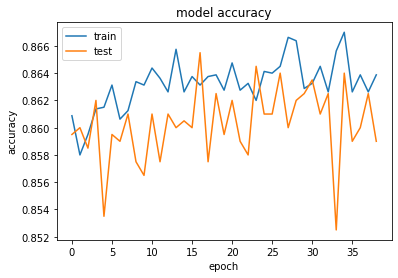

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

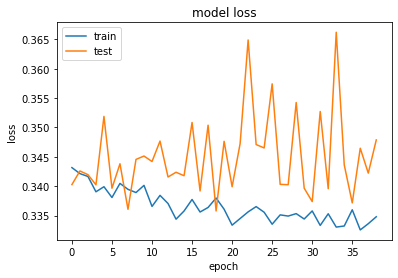

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1538,   57],
       [ 225,  180]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.859

In [ ]:
##get the weights
classifier.get_weights()

[array([[-0.0480971 ,  1.5965813 , -0.09734328, -0.02796393,  0.19836634,
         -1.6597499 , -0.3478716 ,  0.642032  , -0.22837833,  0.3885008 ],
        [-4.326165  , -1.9313787 , -1.4328883 ,  1.3367083 ,  4.1971765 ,
          2.0619714 ,  1.1827929 ,  0.78781074,  3.2081645 , -1.6527395 ],
        [-0.2954398 ,  0.3627953 ,  0.16366823, -0.5155376 , -0.069732  ,
         -0.76730204,  0.17481081,  0.23789069, -0.12293125, -0.0171904 ],
        [ 1.1988163 , -1.1311271 ,  0.07047445,  3.5434163 ,  0.7068093 ,
         -0.14635003,  0.9799699 , -0.05688271, -1.5210376 ,  0.5075801 ],
        [-3.5090816 ,  0.8554012 , -0.40762362,  3.1729984 ,  1.7030225 ,
         -2.0999463 ,  3.7051344 ,  1.0271828 , -5.1818757 , -1.6904447 ],
        [-0.10325828,  2.1000414 , -1.1226498 , -0.188929  , -0.2504626 ,
          0.2218461 , -0.47104   , -0.39065492, -0.16209766,  1.3810012 ],
        [-1.0062263 ,  0.01373931,  0.34020177, -1.1092609 ,  1.7664738 ,
          0.2191727 , -0.6089463

In [ ]:
## Saving h5 file
classifier.save('model.h5')

In [ ]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [ ]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[0.2482955 ],
       [0.2482955 ],
       [0.2482955 ],
       ...,
       [0.13263653],
       [0.2482955 ],
       [0.2482955 ]], dtype=float32)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Regression
## Divide the dataset into independent and dependent features

X1=df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y1=df.iloc[:,12]

In [ ]:
## Ferature Engineering 
geography=pd.get_dummies(X1['Geography'],drop_first=True)
gender=pd.get_dummies(X1['Gender'],drop_first=True)
## concatenate these variables with dataframe
X1=X1.drop(['Geography','Gender'],axis=1)
X1=pd.concat([X1,geography,gender],axis=1) 
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X1_train=sc.fit_transform(X_train)
X1_test=sc.transform(X_test)

### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))


# adding the first hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

##adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

##  Adding the output layer
regressor.add(Dense(1))


In [ ]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mse=tf.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tf.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [ ]:
regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="mae",
    patience=15
   
)

In [ ]:
model_history1=regressor.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: 1145105280.0000 - mae: 15137.2939 - val_loss: 40739308.0000 - val_mae: 4941.9644
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 23222946.0000 - mae: 3594.7229 - val_loss: 11288425.0000 - val_mae: 2416.8335
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 5854338.5000 - mae: 1634.4263 - val_loss: 2506050.5000 - val_mae: 983.5160
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 1326126.8750 - mae: 671.3835 - val_loss: 589431.3750 - val_mae: 447.8269
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 328996.2500 - mae: 274.6479 - val_loss: 156085.6875 - val_mae: 200.2054
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 92813.1406 - mae: 123.3803 - val_loss: 47223.9023 - val_mae: 63.1019
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 30437.2461 - mae: 65.1567 -

In [ ]:
y_pred=regressor.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

-82040796199.99733
